In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy.stats as st
import scipy.special as sp
from scipy.integrate import quad, dblquad
import seaborn as sns

from ipywidgets import interact
sns.set(style='ticks', context='paper', font_scale=1.5)

from rakott.mpl import fig_panel_labels, fig_xlabel

import sympy as sm
sm.init_printing()

# Fluctuating transmission, constant selection

In [2]:
x, w, ρ, r, s = sm.symbols('x w ρ r s')

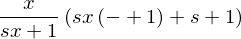

In [3]:
y = x * (x * s * (1 - ρ) + 1 + ρ * s) / (1 + x * s)
y

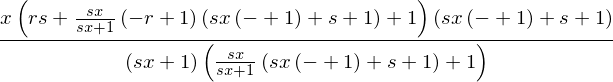

In [4]:
z = y * (y * s * (1 - r) + 1 + r * s) / (1 + y * s)
z

## Solve x''=x

In [5]:
sm.simplify((z-x).subs(x, 0)), sm.simplify((z-x).subs(x, 1))

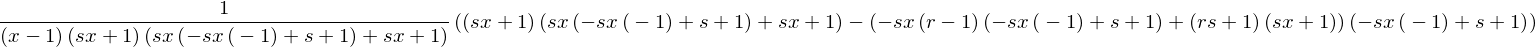

In [6]:
G = (z - x) / (x * (1 - x))
sm.simplify(G)

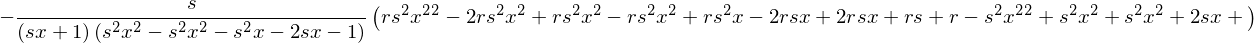

In [7]:
sm.factor(G)

In [8]:
G = sm.simplify(G * (1 + x * s) * (1 + x * s * (2 + s * ρ) + x**2 * s **2 * (1 - ρ)) / s)
G

In [9]:
a, b, c = sm.Poly(G, x).all_coeffs()

In [10]:
sm.simplify(a)

In [11]:
sm.simplify(b)

In [12]:
sm.simplify(c)

In [13]:
x1, x2 = sm.simplify(sm.solve(G, x))
sm.simplify(G.subs({x:x1})), sm.simplify(G.subs({x:x2}))

NameError: name 'solve' is not defined

In [ ]:
ρ_ = 0.01
s_ = 0.1
r_ = np.linspace(0, 1)
plt.plot(
    r_,
    [x1.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_1$'
)
plt.plot(
    r_,
    [x2.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_2$'
)
plt.axhline(0, color='k')
plt.axhline(1, color='k')
plt.legend()
plt.xlabel('$r$')
plt.ylabel('fixed point')

In [ ]:
def recursion(x, s, ρ, r):
    wbar = 1 + s * x
    x = ρ * (1 + s) * x / wbar + (1-ρ) * x
    wbar = 1 + s * x
    x = r * (1 + s) * x / wbar + (1 - r) * x
    return x

In [ ]:
ρ = 0.1
r = 0.2
s = 0.5

x0 = 0.5
n = 1000

x = np.empty(n)
x[0] = x0

for t in range(1, n):
    x[t] = recursion(x[t-1], s, ρ, r)
    
plt.plot(x);

## Diff x''

In [14]:
sm.simplify(sm.diff(z, x).subs({x: 0}))

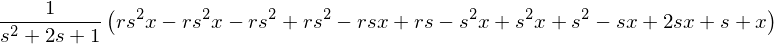

In [15]:
sm.simplify(sm.diff(z, x).subs({x: 1})*(x-1) + 1, 100)

# Fluctuating transmission and selection

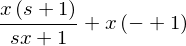

In [16]:
y = ρ * (1+s)/(1+s*x) * x + (1-ρ)*x
y

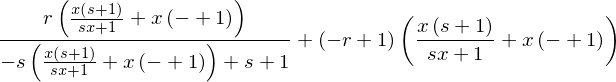

In [17]:
z = r * 1/(1+s-s*y) * y + (1-r)*y
z

## Solve x''=x

In [18]:
sm.simplify((z-x).subs(x, 0)), sm.simplify((z-x).subs(x, 1))

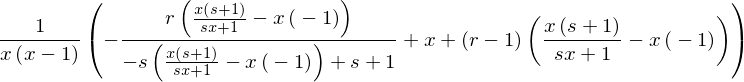

In [19]:
G = (z - x) / (x * (1 - x))
sm.simplify(G)

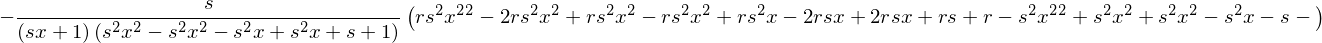

In [20]:
sm.factor(G)

In [21]:
G = sm.simplify(G * -(1+s*x)*(s**2 * x**2 * ρ - s**2 * x**2 - s**2 * x * ρ + s**2 * x + s + 1)/s)
G

In [22]:
a, b, c = sm.Poly(G, x).all_coeffs()

In [23]:
sm.simplify(a)

In [24]:
sm.simplify(b)

In [25]:
sm.simplify(c)

In [27]:
x1, x2 = sm.simplify(sm.solve(G, x))
sm.simplify(G.subs({x:x1})), sm.simplify(G.subs({x:x2}))

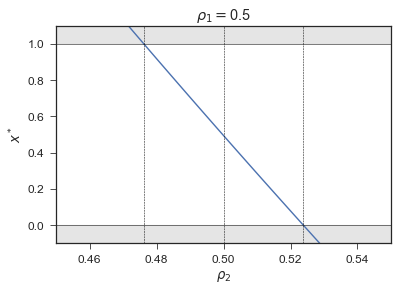

In [31]:
ρ_ = 0.5
s_ = 0.1
r_ = np.linspace(ρ_*0.9, ρ_*1.1)
plt.plot(
    r_,
    [x2.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_2$'
)
plt.plot(
    r_,
    [x1.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_1$'
)

axline_kws = dict(color='k', lw=0.5)
plt.axhline(0, **axline_kws)
plt.axhline(1, **axline_kws)
plt.axvline(ρ_, **axline_kws, ls='--')
plt.axvline(ρ_*(1+s_)/(1+ρ_*s_), **axline_kws, ls='--')
plt.axvline(ρ_/(1+s_*(1-ρ_)), **axline_kws, ls='--')
plt.fill_between([0,1], 1, 1.1, color='k', alpha=0.1)
plt.fill_between([0,1], -0.1, 0, color='k', alpha=0.1)
# plt.legend()
plt.xlabel(r'$\rho_2$')
plt.ylabel('$x^*$')
plt.title(r'$\rho_1=$' + '{}'.format(ρ_))
plt.ylim(-0.1, 1.1)
plt.xlim(r_.min(), r_.max())
plt.savefig('../figures/rho1_rho2_k=1.pdf')

In [86]:
sm.simplify(2*a+b-s*(1-ρ)*(2*r*(1+s) +s*ρ*(1-r)))

In [118]:
ρ_ = 0.5
r_ = np.linspace(ρ_-0.04, ρ_+0.04, 101)
s_ = np.logspace(-3, -1, 51)
x_ = np.array([[x2.subs({s:s__, r:r__, ρ:ρ_}) for s__ in s_] for r__ in r_], dtype=np.float64)

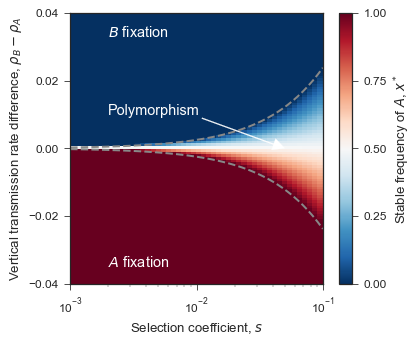

In [129]:
fig, ax = plt.subplots(figsize=(6,5))
im = ax.pcolormesh(
    s_, r_-ρ_, x_, vmin=0, vmax=1, cmap='RdBu_r', rasterized=True#(0<=x_)&(x_<=1), cmap='gray'
)
# ax.contour(s_, r_, ρ_*(1+s_)/(1+ρ_*s_))
ax.set(
    xscale='log',
    xlabel=r'Selection coefficient, $s$',
    ylabel=r'Vertical transmission rate difference, $\rho_B-\rho_A$',
    yticks=np.linspace(-0.04, 0.04, 5)
)
linekws = dict(lw=2, ls='--', color='#888888')
ax.plot(s_, ρ_*(1+s_)/(1+ρ_*s_)-ρ_, **linekws)
ax.plot(s_, ρ_/(1+s_*(1-ρ_))-ρ_, **linekws)
ax.text(2e-3, 0.033, '$B$ fixation', color='w')
ax.text(2e-3, -0.035, '$A$ fixation', color='w')
ax.annotate('Polymorphism', (5e-2, 0.5-ρ_), (2e-3, 0.51-ρ_), 
             arrowprops=dict(width=1, color='w'), color='w');
cb = plt.colorbar(im)
cb.set_label(r'Stable frequency of $A$, $x^*$')
cb.set_ticks(np.linspace(0, 1, 5))
fig.tight_layout()
fig.savefig('../figures/rho1_rho2_phase_k=1.pdf')

# Stochastic environment

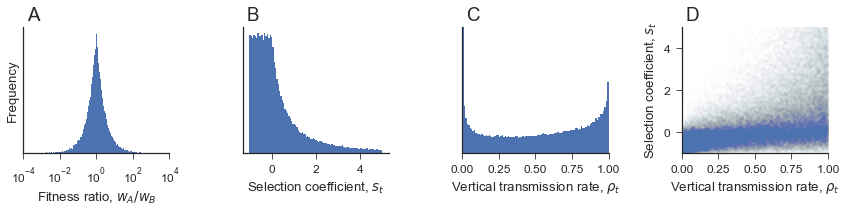

In [3]:

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=False, sharey=False)

ax = axes[0]
# for s in [ -0.5, -0.1, 0.1, 0.5]:
#     a = 1+s
#     b = 1
#     x = np.linspace(0, 1, 1000)
#     f = st.beta(a, b).pdf(x)
#     ax.plot(x, f, label=s)
# ax.set_xlim(0, 1)
# # ax.set_xlabel(r'Vertical transmission rate, $\rho_t$')
# ax.set_ylabel(r'Frequency, $f(\rho_t)$')
# ax.set_ylim(0, 2)
# ax.legend(loc='lower right', ncol=2)#title='selection coefficient, $s_t$', 

wA = np.random.uniform(0, 1, size=100000)
wB = np.random.uniform(0, 1, size=100000)
s = wA/wB - 1
ρ = np.random.beta(a=wA/wB, b=1)

ax = axes[0]
ax.hist(wA/wB, bins=np.logspace(-6, 6, 1000))
ax.set_xlim(1e-4, 1e4)
ax.set_xscale('log')
ax.set_xlabel('Fitness ratio, $w_A/w_B$')
ax.set_ylabel(r'Frequency')
ax.set_yticks([])

ax = axes[1]
ax.hist(s, bins=np.linspace(s.min(), 5, 100))
ax.set(xlabel='Selection coefficient, $s_t$')#, ylabel='Frequency',)
ax.set_yticks([])

ax = axes[2]
ax.hist(ρ, normed=True, bins=100)
ax.set_xlabel(r'Vertical transmission rate, $\rho_t$')
# ax.set_ylabel(r'Frequency')
ax.set_xlim(0, 1)
ax.set_ylim(0, 5)
ax.set_yticks([])
# ax.set_yscale('log')

ax=axes[3]
ax.scatter(ρ, s, alpha=0.0075, marker='.')
# sns.regplot(ρ, s, ci=False, scatter_kws=dict(alpha=0.001, marker=','), line_kws=dict(color='k', ls='--'), ax=ax)
ax.set(ylabel='Selection coefficient, $s_t$', ylim=(-1,5), xlim=(0,1), xlabel=r'Vertical transmission rate, $\rho_t$');

# fig_xlabel(fig, r'Vertical transmission rate, $\rho_t$')
fig_panel_labels(axes, xcoord=0.025, ycoord=1.05)
fig.tight_layout()
sns.despine()
fig.savefig('../figures/beta.pdf')
fig.savefig('../figures/beta.png')

In [4]:
wA = np.random.uniform(0, 1, size=100000000)
wB = np.random.uniform(0, 1, size=100000000)
s = wA/wB - 1
ρ = np.random.beta(a=wA/wB, b=1)
np.cov(s, ρ)[0,1]

In [5]:
wA = np.random.uniform(0, 1, size=100000000)
wB = np.random.uniform(0, 1, size=100000000)
s = wA/wB - 1
ρ = np.random.beta(a=1, b=wA/wB)
np.cov(s, ρ)[0,1]

In [6]:
def f1(s, ρ1, ρ2, p):
    return p*np.log(1+s*ρ1)  + (1-p)*np.log(1-s*ρ2)

def f2(s, ρ1, ρ2, p):
    return p*np.log(1-s*ρ1/(1+s)) + (1-p)*np.log(1+s*ρ2/(1-s))

In [7]:
s = 0.05
p = 0.505
ρ1s = np.linspace(0, 1, 500)
ρ2s = np.linspace(0, 1, 500)
fix = np.array([
    [
        int(f1(s, ρ1, ρ2, p)>0) - int(f2(s, ρ1, ρ2, p)>0)
        for ρ2 in ρ2s
    ]
    for ρ1 in ρ1s
])

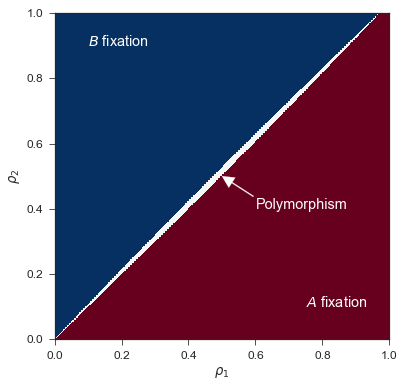

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolormesh(ρ2s, ρ1s, fix, cmap='RdBu', edgecolors='face', rasterized=True)
ax.set(
    xlabel=(r'$\rho_1$'),
    ylabel=(r'$\rho_2$')
)
ax.text(0.1, 0.9, '$B$ fixation', color='w')
ax.text(0.75, 0.1, '$A$ fixation', color='w')
ax.annotate('Polymorphism', (0.5, 0.5), (0.6, 0.4), 
             arrowprops=dict(width=1, color='w'), color='w');
fig.savefig('../figures/rho1_rho2_stoch_p.pdf')

# k != l

In [13]:
x, ρ, r, s, ϵ = sm.symbols('x ρ r s ϵ')
k, l = sm.symbols('k l', integer=True)

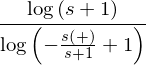

In [9]:
rhs = sm.log(1+ρ*s)/sm.log(1-r*s/(1+s))
rhs = rhs.subs({r:ρ+ϵ})
rhs

In [ ]:
a = (1+ρ*s)
b = (1-(ρ+ϵ)*s/(1+s))

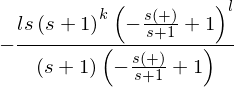

In [18]:
sm.diff(
    a**k * b**l,
    ϵ
)

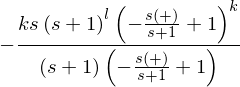

In [19]:
sm.diff(
    a**l * b**k,
    ϵ
)

In [35]:
subs = {s:0.9, k:1, l:2, ρ:0.1, ϵ:0.3}
(a**k * b**l).subs(subs), (a**l * b**k).subs(subs)

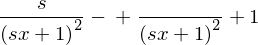

In [39]:
FA = x*(1+s)/(1+s*x)*ρ + x*(1-ρ)
fA = sm.simplify(sm.diff(FA, x))
fA

In [40]:
fA.subs({x:0})

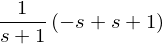

In [42]:
sm.simplify(fA.subs({x:1}))

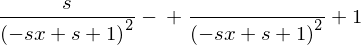

In [43]:
FB = x/(1+s-s*x)*ρ + x*(1-ρ)
fB = sm.simplify(sm.diff(FB, x))
fB

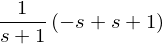

In [46]:
sm.simplify(fB.subs({x:0}))

In [45]:
fB.subs({x:1})